In [1]:
from google.colab import files  
uploaded = files.upload()

Saving IceCreamData.csv to IceCreamData.csv


In [2]:
# Import packages and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read the IceCreamData.csv file
IceCream=pd.read_csv('IceCreamData.csv')
print(IceCream)

     Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]


In [4]:
# Print first 5 data
IceCream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
# Print last 5 data
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
# Print mathematical description
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
# Print information of Dataset
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


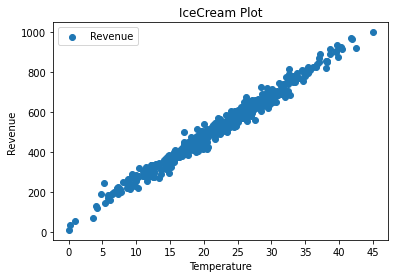

In [8]:
#Plotting Data on the Scatter Plot to Check Linearity
plt.scatter(IceCream['Temperature'], IceCream['Revenue'])
plt.title("IceCream Plot")
plt.xticks(np.arange(0,50,5))
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.legend(["Revenue"])
plt.show()

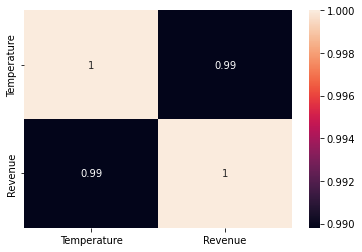

In [9]:
#Correlation Matrix
import seaborn as sb
data_corr = IceCream.corr()
sb.heatmap(data_corr, annot=True)

In [10]:
# Linear Regression Model
from sklearn import linear_model
regress = linear_model.LinearRegression()
train_x = np.asanyarray(IceCream[['Temperature']])
train_y = np.asanyarray(IceCream[['Revenue']])

regress.fit(train_x, train_y)
print("Coefficients: ", regress.coef_)
print("Intercept: ", regress.intercept_)

Coefficients:  [[21.44362551]]
Intercept:  [44.83126709]


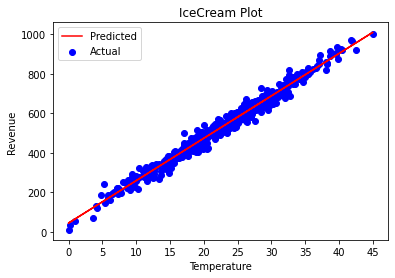

In [11]:
#Plotting Regression Line on the Scatter Plot
plt.scatter(IceCream.Temperature, IceCream.Revenue, color = "blue", label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x+regress.intercept_[0],'-r', label="Predicted")
plt.title("IceCream Plot")
plt.xticks(np.arange(0,50,5))
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.legend()
plt.show()

In [12]:
#Predicting Revenue
y_predicted = regress.predict(train_x)
# for i in range(len(train_x)):
#   print(train_y[i], y_predicted[i])
IceCream['Predicted'] = y_predicted
print(IceCream.head())

   Temperature     Revenue   Predicted
0    24.566884  534.799028  571.634337
1    26.005191  625.190122  602.476847
2    27.790554  660.632289  640.761497
3    20.595335  487.706960  486.469919
4    11.503498  316.240194  291.507963


In [13]:
#Metrics
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(train_y, y_predicted))
print("Mean Squared Error: ", metrics.mean_squared_error(train_y, y_predicted))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error:  19.585861206200104
Mean Squared Error:  623.0963653020007
Root Mean Squared Error:  24.96189827120527
